In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
############################
#    COMPLETED SOLUTION    #
############################

def transport_solver(c, k1, k2, x_max, nx, dt, t_max):
    """
    Solve the 1D linear transport equation:
        partial_t u + c partial_x u = 0
    with boundary condition u(0,t) = k1 and initial condition u(x,0) = k2,
    using the upwind scheme for c > 0.
    
    Parameters
    ----------
    c : float
        Transport velocity (c > 0).
    k1 : float
        Boundary condition at x=0.
    k2 : float
        Initial condition for x > 0.
    x_max : float
        Maximum spatial domain length (0 <= x <= x_max).
    nx : int
        Number of spatial grid points.
    dt : float
        Time step size (must satisfy stability: c*dt <= dx).
    t_max : float
        Final time to run the solver.
    
    Returns
    -------
    x : ndarray of shape (nx,)
        Spatial grid points.
    times : ndarray of shape (nt+1,)
        The times at which the solution was stored.
    solutions : list of ndarrays
        Each entry solutions[n] is the solution array u at time times[n].
    """
    
    # 1) Create the spatial grid x
    dx = x_max / (nx - 1)
    x = np.linspace(0, x_max, nx)
    
    # 2) Determine number of time steps
    nt = int(t_max // dt)  # or int(t_max/dt)

    # 3) Initialize time array
    times = np.arange(nt+1) * dt

    # 4) Create the initial condition array for u
    #    (assuming u= k2 for x>0)
    u = np.full(nx, k2)

    # Overwrite boundary condition at x=0
    u[0] = k1

    # 5) Create a list to store solutions at each time
    solutions = []
    solutions.append(u.copy())

    # 6) Time stepping using upwind for c>0
    for n in range(nt):
        u_new = u.copy()

        # Enforce boundary condition at x=0
        u_new[0] = k1

        # Upwind update for i in [1, nx)
        for i in range(1, nx):
            u_new[i] = u[i] - (c * dt / dx) * (u[i] - u[i-1])

        # Update u and store
        u = u_new
        solutions.append(u.copy())

    return x, times, solutions


def get_nearest_time_index(target_time, time_array):
    """
    Returns the index i such that time_array[i] is closest to target_time.
    """
    i = np.argmin(np.abs(time_array - target_time))
    return i


def analytical_solution(x, t, c, k1, k2):
    """
    Compute the piecewise analytical solution at time t for x >= 0, c>0,
    boundary condition u(0,t)=k1, initial condition u(x,0)=k2.
    """
    # For a right-moving wave, if x < c*t => k1, else k2
    return np.where(x < c * t, k1, k2)


def plot_snapshots(x, times, solutions, c, k1, k2, snap_times):
    """
    Plot the numerical and analytical solutions at each time in snap_times.
    Uses get_nearest_time_index to find the stored times that are closest to
    each desired snapshot time.
    
    Parameters
    ----------
    x : ndarray
        The spatial grid.
    times : ndarray
        All times for which we have stored the numeric solutions.
    solutions : list of ndarrays
        solutions[n] is the numeric solution at times[n].
    c, k1, k2 : floats
        PDE / boundary parameters.
    snap_times : list of floats
        The times at which we want to compare numeric to analytic solutions.
    """
    plt.figure(figsize=(8,6))

    for t_snap in snap_times:
        # 1) Find nearest stored time index
        idx = get_nearest_time_index(t_snap, times)
        
        # 2) Retrieve numeric solution
        u_num = solutions[idx]
        
        # 3) Compute exact solution
        u_exact = analytical_solution(x, times[idx], c, k1, k2)
        
        # 4) Plot
        plt.plot(x, u_num, label=f"Numeric (t={times[idx]:.3f})")
        plt.plot(x, u_exact, '--', label=f"Exact (t={times[idx]:.3f})")
    
    plt.xlabel("x")
    plt.ylabel("u")
    plt.title("Snapshots of the Transport Equation Solution")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


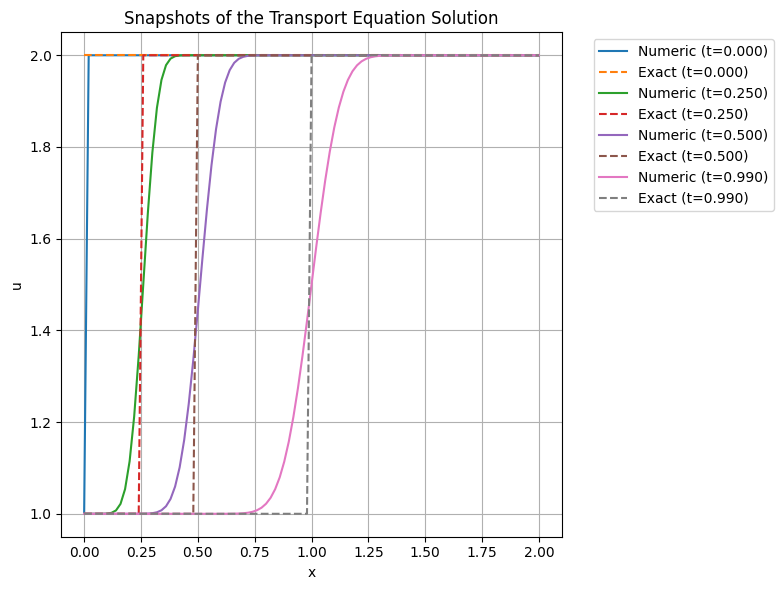

In [7]:
x, times, solutions = transport_solver(c=1.0, 
                                       k1=1.0, 
                                       k2=2.0,
                                       x_max=2.0, 
                                       nx=101,
                                       dt=0.01, 
                                       t_max=1.0)

plot_snapshots(x, times, solutions, c=1.0, k1=1.0, k2=2.0,
               snap_times=[0.0, 0.25, 0.5, 1.0])


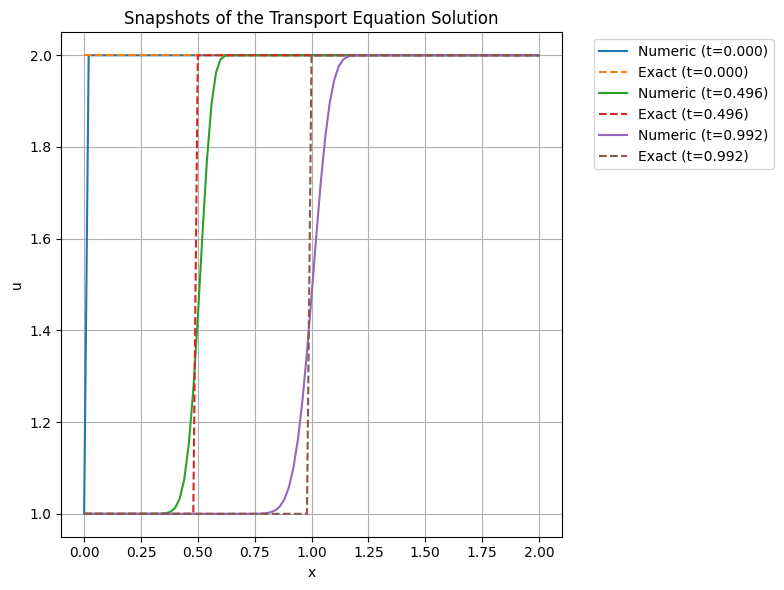

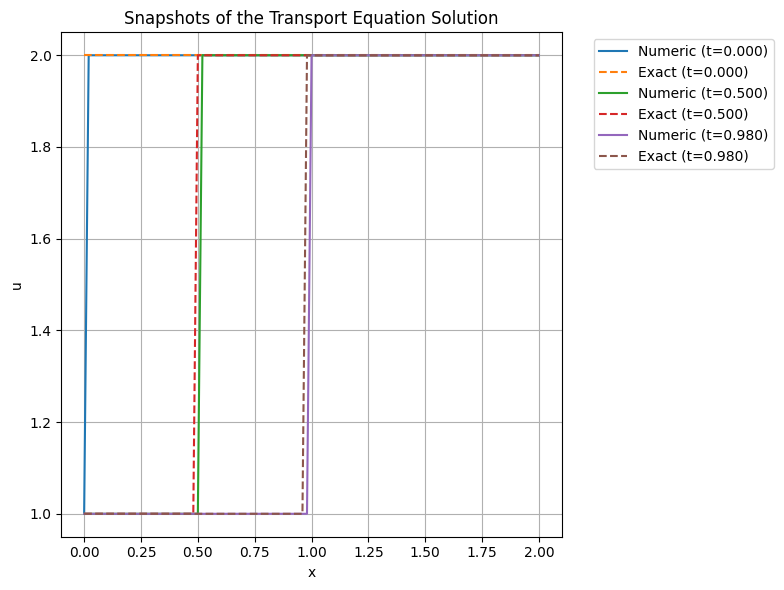

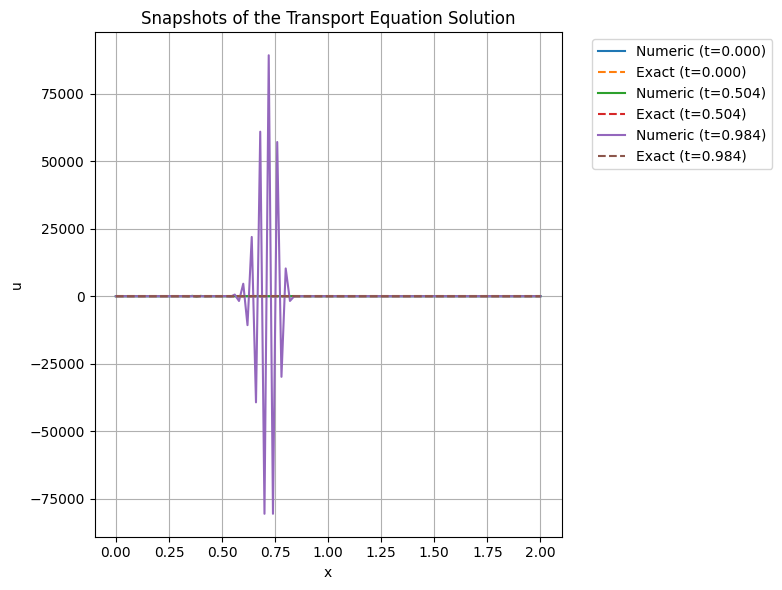

In [3]:
# Set domain and PDE parameters
c = 1.0
k1, k2 = 1.0, 2.0
x_max = 2.0
nx = 101
t_max = 1.0

dx = x_max / (nx - 1)

# Define three time steps
dt_list = [
    0.8 * dx / c,
    1.0 * dx / c,
    1.2 * dx / c  # intentionally above the limit
]

snap_times = [0.0, 0.5, 1.0]  # for example

# Loop over the different dt values
for dt in dt_list:
    x, times, solutions = transport_solver(c, k1, k2, x_max, nx, dt, t_max)
    
    # Plot snapshots for each dt
    plot_snapshots(x, times, solutions, c, k1, k2, snap_times)